#                                            Netflix Business Case study

                                                                                                           Rohit Nargundkar

###  The aim of  analyzing this data is to generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

In [1]:
#Importing libraries in jupyter notebook:-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("netflix.csv")

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## 1. Defining Problem Statement and Analysing basic metrics 

###      The problem statement is to analyze the data related to movies and TV shows available on Netflix and generate insights that can help Netflix decide which type of shows/movies to produce and how to grow the business in different countries.To begin the analysis, we need to gather basic metrics and information about the dataset, such as the number of records, data types of attributes, and identify any missing values. 

## Analyzing basic metrics

In [4]:
#Count of Tv shows and movies
df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [5]:
#Total number to TV shows and movies 
df["title"].count()

8807

In [6]:
#No of unique countries
df["country"].nunique()

748

In [7]:
#Countries with most TV shows/movies
df["country"].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [8]:
# Unique release year
df["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [9]:
# Oldest tv show/movie release date 
df["release_year"].unique().min()

1925

In [10]:
# Lastest tv show/movie release date 
df["release_year"].unique().max()

2021

## 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

## Data preprocessing

In [11]:
# shape of the data 
df.shape
# The dataframe contains 8807 rows and 12 columns.

(8807, 12)

In [12]:
# checking for null values/attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
#Converting atributes to "category" data type
df["type"] = df["type"].astype("category")
df["country"] = df["country"].astype("category")
df["rating"] = df["rating"].astype("category")

In [14]:
df["date_added"].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [15]:
# data types of all columns after making changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   object  
 5   country       7976 non-null   category
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   category
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(3), int64(1), object(8)
memory usage: 676.6+ KB


In [16]:
# Missing values for each column
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
# Missing values are as follows :- director (2634), cast (825), country (831),date_added (10), rating (10), duration (3)


## Getting only the number from 'duration column'


In [18]:
df["duration"]= df["duration"].str.split(" ", expand=True)[0]
df["duration"]= df["duration"].astype("float64")

## a. Imputing NULL values

In [19]:
#Fixing the 'duration' column
# There are 3 missing duration values from movies category so,
# Filling the missing values with the average movie duration.

movie_duration= round(df[df["type"]=="Movie"]["duration"].mean(),0)
df["duration"].fillna(movie_duration, inplace= True)

In [20]:
#Since data type of 'rating' is 'category', we will use mode to fill the 4 null values

rating_mode= df["rating"].mode()[0]
df["rating"].fillna(rating_mode,inplace=True)

In [21]:
# Backfilling 'country' data type as it is categorical data type
df["country"].fillna(method="bfill",inplace =True)

In [22]:
#Similarly forward filling the values in "date_added".
df["date_added"].fillna(method="ffill",inplace=True)

## b. Unnesting

In [23]:
# Unnesting 'cast' column and melting it into rows
cast=df["cast"].str.split(',',expand=True)
pi= pd.concat([df,cast],axis=1)
pi=pi.melt(id_vars = pi.columns[0:12].tolist(),value_name= "Cast")
pi.drop(pi[pi["Cast"].isna()].index,inplace =True)
pi.drop("cast",axis=1,inplace= True)

In [24]:
# Unnesting the 'country' column and melting it in rows
country = pi["country"].str.split(", ", expand = True)
pi2 = pd.concat([pi,country],axis = 1)
pi2.drop(["country","variable"], axis = 1, inplace = True)
pi2 = pi2.melt(id_vars = pi2.columns[:11], value_name = "country").drop("variable",axis = 1)
pi2.drop(pi2[pi2["country"].isna()].index, inplace = True)


In [25]:
# Unnesting the 'listed_in' column and melting it in rows
listed_in = pi2["listed_in"].str.split(", ", expand = True)
pi3 = pd.concat([pi2,listed_in],axis = 1)
pi3.drop("listed_in", axis = 1, inplace = True)
pi3 = pi3.melt(id_vars = pi3.columns[:11], value_name = "genre").drop("variable",axis = 1)
pi3.drop(pi3[pi3["genre"].isna()].index, inplace = True)


In [26]:
# Saving the file in desktop
pi3.to_csv(r'C:\Users\Administrator\Desktop\cleaned_data.csv')
pi3 = pd.read_csv(r'C:\Users\Administrator\Desktop\cleaned_data.csv')

In [27]:
pi3.drop("Unnamed: 0", axis = 1, inplace = True)

In [28]:
# Fill null values in 'director' and 'cast' columns with a new category 'Unknown'
pi3['director'].fillna('Unknown Director', inplace=True)
pi3['Cast'].fillna('Unknown Actor', inplace=True)

In [29]:
# Unnesting director column
director_x = pi3["director"].str.split(", ", expand=True)
final = pd.concat([pi3, director_x], axis=1)
final.drop("director", axis=1, inplace=True)
final = final.melt(id_vars=final.columns[:11], value_name="director").drop("variable", axis=1)
final.drop(final[final["director"].isna()].index, inplace=True)

In [30]:
# Backfilling 'country' data type as it is categorical data type
final["country"].fillna(method="bfill",inplace =True)

In [31]:
# Saving the final cleaned dataset
final.to_csv(r'C:\Users\Administrator\Desktop\final.csv',index=False)

In [32]:
# Reading the dataset
final = pd.read_csv(r'C:\Users\Administrator\Desktop\final.csv')

In [33]:
final

,show_id,type,title,date_added,release_year,rating,duration,description,Cast,country,genre,director
0,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,International TV Shows,Unknown Director
1,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1.0,To protect his family from a powerful drug lor...,Sami Bouajila,India,Crime TV Shows,Julien Leclercq
2,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2.0,In a city of coaching centers known to train I...,Mayur More,India,International TV Shows,Unknown Director
3,s6,TV Show,Midnight Mass,"September 24, 2021",2021,TV-MA,1.0,The arrival of a charismatic young priest brin...,Kate Siegel,United States,TV Dramas,Mike Flanagan
4,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,United States,Children & Family Movies,Robert Cullen
...,...,...,...,...,...,...,...,...,...,...,...,...
203518,s5888,Movie,Walt Disney Animation Studios Short Films Coll...,"October 25, 2015",2015,TV-Y,90.0,This collection of 12 short films from Disney ...,Dave Foley,United States,Children & Family Movies,Mark Henn
203519,s5888,Movie,Walt Disney Animation Studios Short Films Coll...,"October 25, 2015",2015,TV-Y,90.0,This collection of 12 short films from Disney ...,Derek Richardson,United States,Children & Family Movies,Mark Henn
203520,s5888,Movie,Walt Disney Animation Studios Short Films Coll...,"October 25, 2015",2015,TV-Y,90.0,This collection of 12 short films from Disney ...,Betty White,United States,Children & Family Movies,Mark Henn
203521,s5888,Movie,Walt Disney Animation Studios Short Films Coll...,"October 25, 2015",2015,TV-Y,90.0,This collection of 12 short films from Disney ...,Zachary Levi,United States,Children & Family Movies,Mark Henn


### Statistical analysis


In [34]:
# Top 5 directors
final.groupby("director").apply(lambda x:x ["title"].nunique()).sort_values(ascending=False).head(5)

director
Unknown Director    2282
Jan Suter             21
Raúl Campos           19
Rajiv Chilaka         19
Marcus Raboy          16
dtype: int64

In [35]:
# Top 5 countries
final.groupby("country").apply(lambda x:x["title"].nunique()).sort_values(ascending=False).head(5)

country
United States     3613
India             1084
United Kingdom     772
Canada             453
France             393
dtype: int64

In [36]:
# Sort the DataFrame by the "date_added" column in ascending order
oldest_show = final.sort_values(by='date_added', ascending=True)

# Get the first show/movie (oldest) from the sorted DataFrame
first_show = oldest_show.iloc[0]

# Display the first show/movie information
print("First Show/Movie:")
print("Title:", first_show['title'])
print("Date Added:", first_show['date_added'])

First Show/Movie:
Title: Mr. Young
Date Added:  April 16, 2019


In [37]:
# Most recent movie/show added on netflix
most_recent_show = final.iloc[0]
print("Most Recent Show:")
print("Title:", most_recent_show['title'])
print("Date Added:", most_recent_show['date_added'])

Most Recent Show:
Title: Blood & Water
Date Added: September 24, 2021


In [38]:
# Top 10 popular Actors/Actress
final.groupby("Cast").apply(lambda x: x["title"].nunique()).sort_values(ascending = False).head(10)

Cast
 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
Shah Rukh Khan       26
 Rajesh Kava         26
 Boman Irani         25
 Andrea Libman       25
 Yuki Kaji           25
dtype: int64

In [39]:
# Aggregate quantitative details about the Movies
final.loc[final["type"]=="Movie", ["duration","release_year","title"]].drop_duplicates().describe()

,duration,release_year
count,5656.000000,5656.000000
mean,101.355552,2012.911775
std,27.797722,9.599338
min,8.000000,1942.000000
25%,88.000000,2011.000000
50%,100.000000,2016.000000
75%,116.000000,2018.000000
max,312.000000,2021.000000


In [40]:
# Aggregate quantitative details about the TV Shows
final.loc[final["type"]=="TV Show", ["duration","release_year","title"]].drop_duplicates().describe()

,duration,release_year
count,2326.000000,2326.000000
mean,1.837489,2016.503869
std,1.662046,5.254285
min,1.000000,1963.000000
25%,1.000000,2015.000000
50%,1.000000,2018.000000
75%,2.000000,2020.000000
max,17.000000,2021.000000


## 3. Non-Graphical Analysis: Value counts and unique attributes

In [41]:
#Value counts of movies and tv shows
final.groupby("type")["title"].apply(lambda x :x. nunique())

type
Movie      5656
TV Show    2326
Name: title, dtype: int64

In [42]:
# value_counts of release years
final.groupby("release_year")["title"].apply(lambda x: x.nunique())

release_year
1942       1
1944       1
1945       1
1946       1
1947       1
        ... 
2017     912
2018    1026
2019     917
2020     827
2021     494
Name: title, Length: 72, dtype: int64

In [43]:
# Unique years
final["release_year"].unique()

array([2021, 1993, 2020, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2019, 2016, 2015, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1954, 1979, 1958, 1956, 1963, 1970,
       1973, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967, 1968, 1965,
       1945, 1946, 1955, 1942, 1947, 1944], dtype=int64)

In [44]:
# value counts of rating category
final.groupby("rating")["title"].apply(lambda x: x.nunique())

rating
66 min         1
74 min         1
84 min         1
G             40
NC-17          3
NR            63
PG           279
PG-13        477
R            790
TV-14       1955
TV-G         183
TV-MA       2885
TV-PG        719
TV-Y         268
TV-Y7        310
TV-Y7-FV       4
UR             3
Name: title, dtype: int64

In [45]:
# value_counts of countries
final.groupby("country")["title"].apply(lambda x: x.nunique())

country
Afghanistan      1
Albania          1
Algeria          6
Angola           1
Argentina       88
                ..
Vatican City     1
Venezuela        2
Vietnam          7
West Germany     4
Zimbabwe         1
Name: title, Length: 118, dtype: int64

In [46]:
# Unique countries
final["country"].unique()

array(['South Africa', 'India', 'United States', 'United Kingdom',
       'Germany', 'Mexico', 'Turkey', 'Australia', 'Finland', 'China',
       'Nigeria', 'Japan', 'Spain', 'Belgium', 'France', 'South Korea',
       'Argentina', 'Russia', 'Canada', 'Hong Kong', 'Italy', 'Ireland',
       'New Zealand', 'Jordan', 'Colombia', 'Switzerland', 'Israel',
       'Taiwan', 'Bulgaria', 'Poland', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Kuwait', 'Egypt', 'Malaysia', 'Vietnam', 'Sweden',
       'Lebanon', 'Brazil', 'Romania', 'Philippines', 'Iceland',
       'Denmark', 'United Arab Emirates', 'Netherlands', 'Norway',
       'Syria', 'Mauritius', 'Austria', 'Czech Republic', 'Cameroon',
       'United Kingdom,', 'Kenya', 'Chile', 'Luxembourg', 'Bangladesh',
       'Portugal', 'Hungary', 'Senegal', 'Singapore', 'Serbia', 'Namibia',
       'Uruguay', 'Peru', 'Mozambique', 'Belarus', 'Ghana', 'Zimbabwe',
       'Puerto Rico', 'Cyprus', 'Pakistan', 'Paraguay', 'Croatia',
       'Cambodia', 'S

In [47]:
# value_counts of genre
final.groupby("genre")["title"].apply(lambda x: x.nunique())

genre
Action & Adventure               853
Anime Features                    68
Anime Series                     173
British TV Shows                 208
Children & Family Movies         608
Classic & Cult TV                 28
Classic Movies                   109
Comedies                        1662
Crime TV Shows                   395
Cult Movies                       70
Documentaries                    445
Docuseries                       188
Dramas                          2416
Faith & Spirituality              60
Horror Movies                    354
Independent Movies               753
International Movies            2574
International TV Shows          1242
Kids' TV                         409
Korean TV Shows                  147
LGBTQ Movies                      85
Movies                            53
Music & Musicals                 340
Reality TV                       163
Romantic Movies                  609
Romantic TV Shows                357
Sci-Fi & Fantasy                

In [48]:
# Unique genres
final["genre"].unique()

array(['International TV Shows', 'Crime TV Shows', 'TV Dramas',
       'Children & Family Movies', 'Dramas', 'British TV Shows',
       'Comedies', 'TV Comedies', 'Thrillers', 'Docuseries',
       'Horror Movies', "Kids' TV", 'Action & Adventure', 'Reality TV',
       'Documentaries', 'Anime Series', 'International Movies',
       'Sci-Fi & Fantasy', 'Classic Movies', 'TV Shows',
       'Stand-Up Comedy', 'TV Action & Adventure', 'Movies',
       'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV',
       'Anime Features', 'Romantic TV Shows', 'Cult Movies',
       'Independent Movies', 'TV Horror', 'Spanish-Language TV Shows',
       'Music & Musicals', 'Romantic Movies', 'LGBTQ Movies',
       'TV Sci-Fi & Fantasy', 'Sports Movies', 'Korean TV Shows',
       'Faith & Spirituality', 'TV Mysteries', 'Teen TV Shows',
       'Science & Nature TV', 'TV Thrillers'], dtype=object)

## 4. Visual Analysis

### Univariate

Text(0.5, 1.0, 'Distplot of Movie duration')

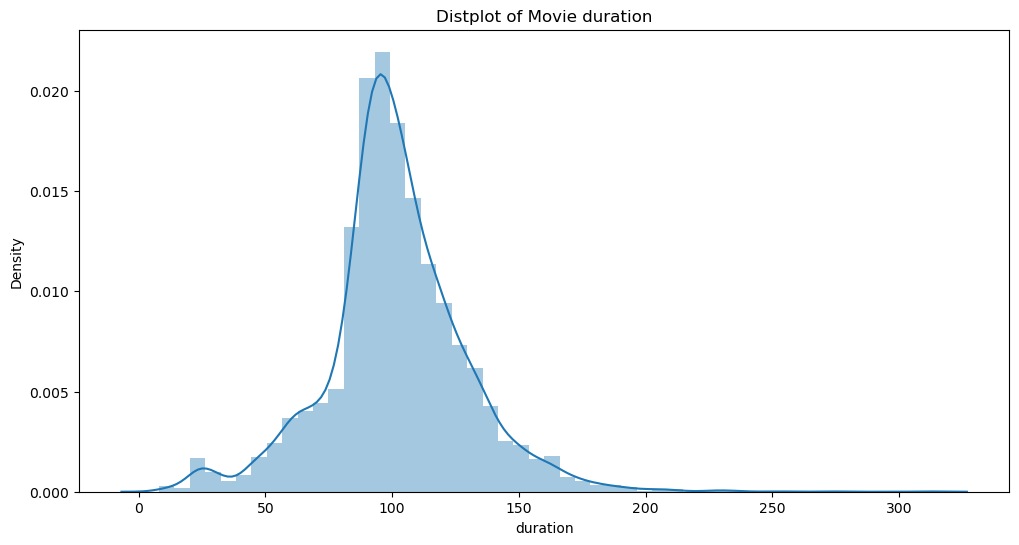

In [49]:
# Distplot of Movie duration
data_ = final.loc[final["type"]=="Movie",["title", "duration"]].drop_duplicates()
plt.figure(figsize=(12, 6))
sns.distplot(data_["duration"])
plt.title("Distplot of Movie duration")
# Majority of the movies have a duration of about 100 mins (1h 40mins)
# The graph says this duration drastically decreases as we move away from the 100mins mark.

Text(0.5, 1.0, 'Countplot for number of seasons for TV shows ')

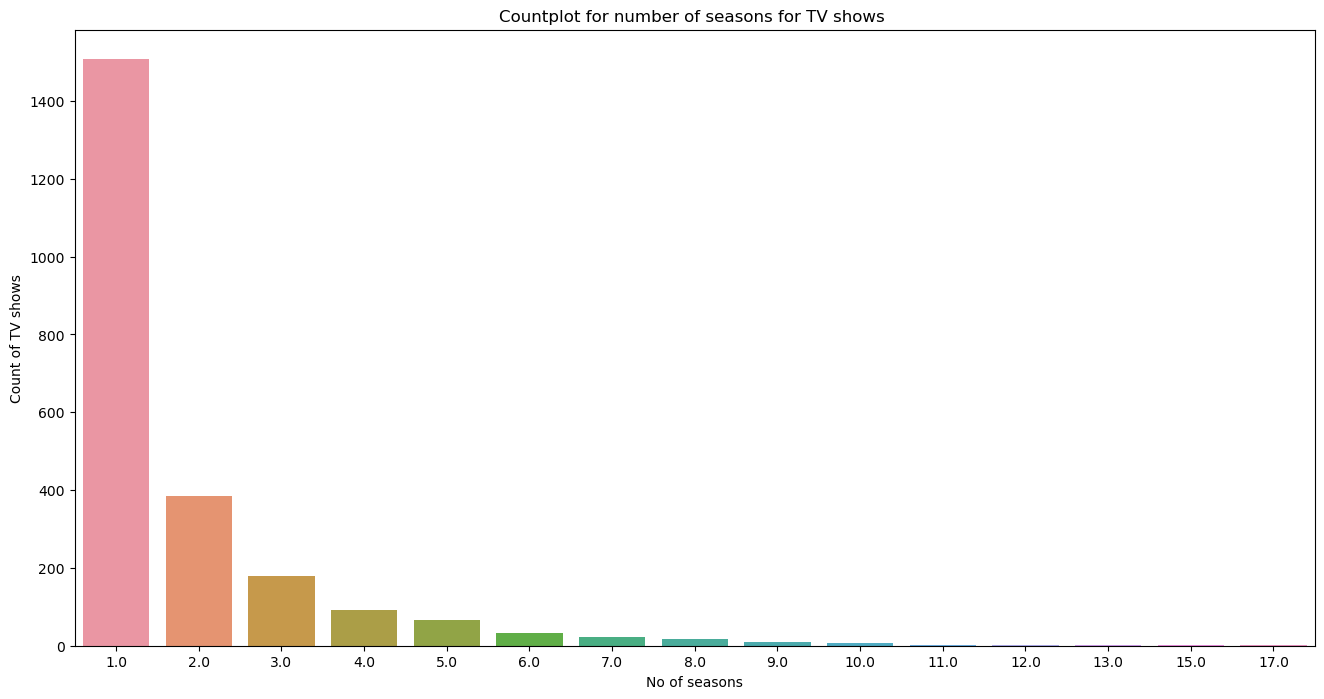

In [50]:
# Countplot of number of seasons of TV Shows
data_ = final.loc[final["type"]=="TV Show",["title", "duration"]].drop_duplicates()["duration"].value_counts().reset_index()
plt.figure(figsize=(16,8))
#plt.xticks(np.linspace(min(data_["duration"]), max(data_["duration"]), num=17))
sns.barplot(data =data_,x="index",y="duration")
plt.xlabel("No of seasons")
plt.ylabel("Count of TV shows")
plt.title("Countplot for number of seasons for TV shows ")

# Majority of the TV shows have only 1 seasons. And after 5 seasons there are very few TV shows.

Text(0.5, 1.0, 'No. of Movies/shows released over the years')

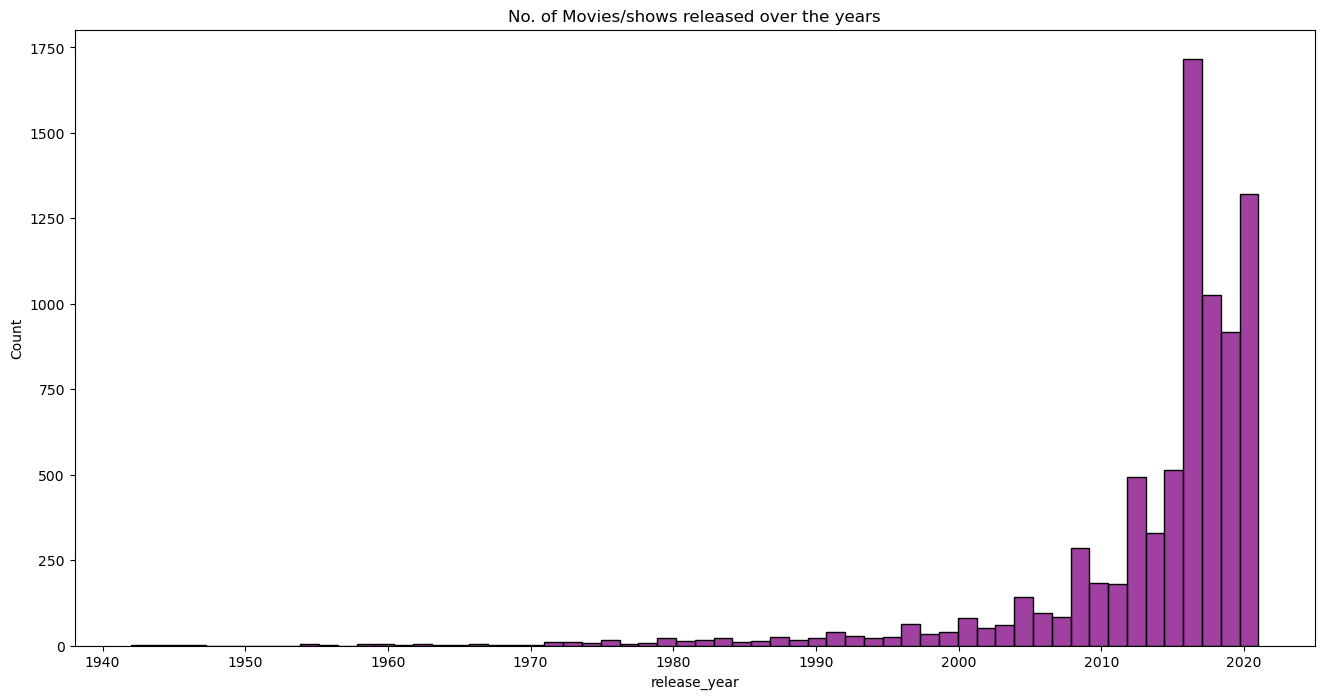

In [51]:
# Histogram for Number of TV shows
data_ = final.loc[:,["title", "release_year"]].drop_duplicates()
plt.figure(figsize=(16, 8))
sns.histplot(data = data_, x= "release_year",bins = 60, color = "purple")
plt.title("No. of Movies/shows released over the years")

# The number of movies/shows released has increased exponentially over the years.
# Peaked at the year 2019 and after that it has decreased.

## Categorical Data

Text(0.5, 1.0, 'Duration time for different genres')

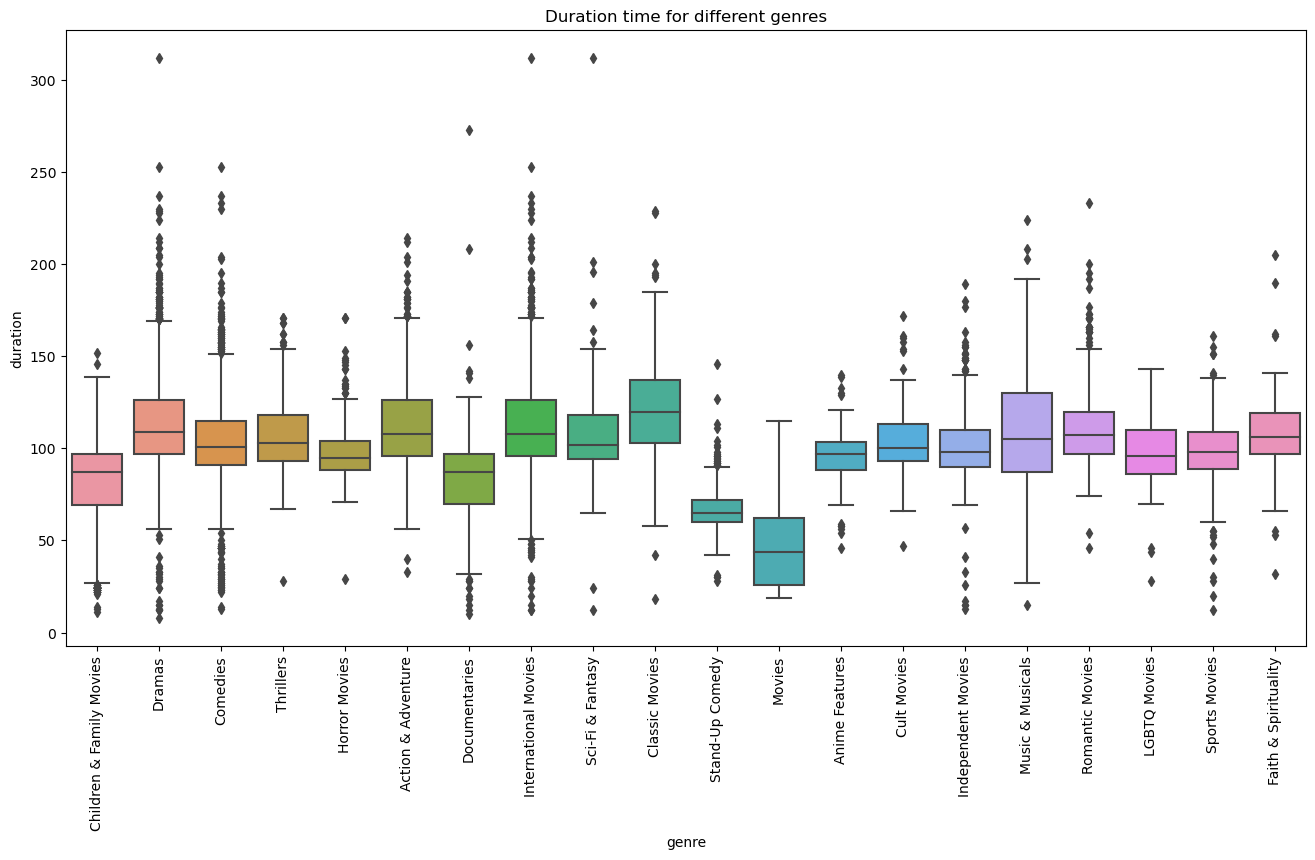

In [52]:
#Duration time for different genres of Movies
plt.figure(figsize=(16, 8))
data_ = final.loc[final["type"]=="Movie", ["title", "genre", "duration"]].drop_duplicates()
plt.xticks(rotation=90)
sns.boxplot(data = data_, x = "genre", y = "duration")
plt.title("Duration time for different genres")
# observe median duration of classical movies is the highest.
# The genre of 'Movies' has the least median duration. These genre of movies are mainly short movies which is of 1
# The genre 'Internation Movies' and 'Drama' have the biggest no. of outliers.

Text(0.5, 1.0, 'Release years of different Ratings')

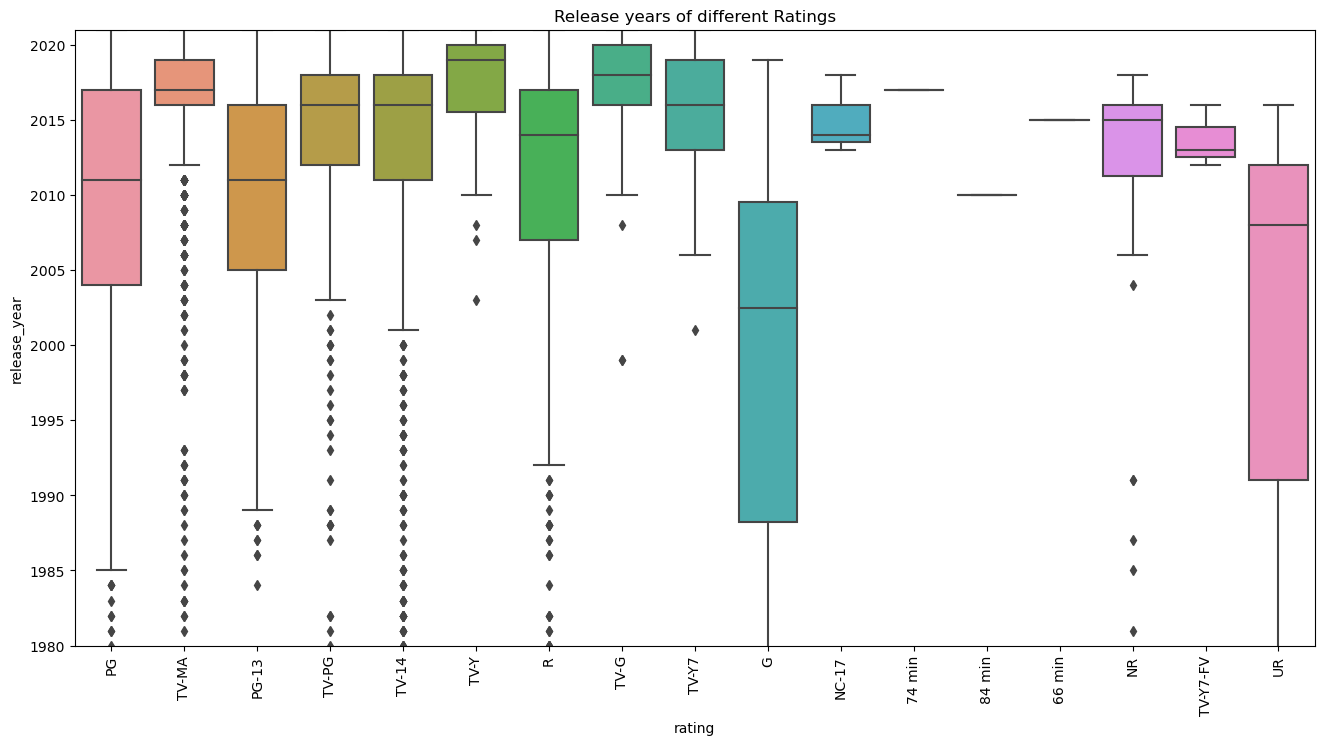

In [53]:
#Release years of different Ratings
plt.figure(figsize=(16, 8))
data_ = final.loc[final["type"]=="Movie", ["title", "rating", "release_year"]].drop_duplicates()
plt.xticks(rotation=90)
plt.ylim([1980,2021])
sns.boxplot(data = data_, x = "rating", y = "release_year")
plt.title("Release years of different Ratings")
# We observe that rating category 'G' and 'UR' are mostly for old movies/shows.
# The rating category 'TV-Y' and 'TV-G' are mostly for newer movies/shows

Text(0.5, 1.0, 'Year added for different genres')

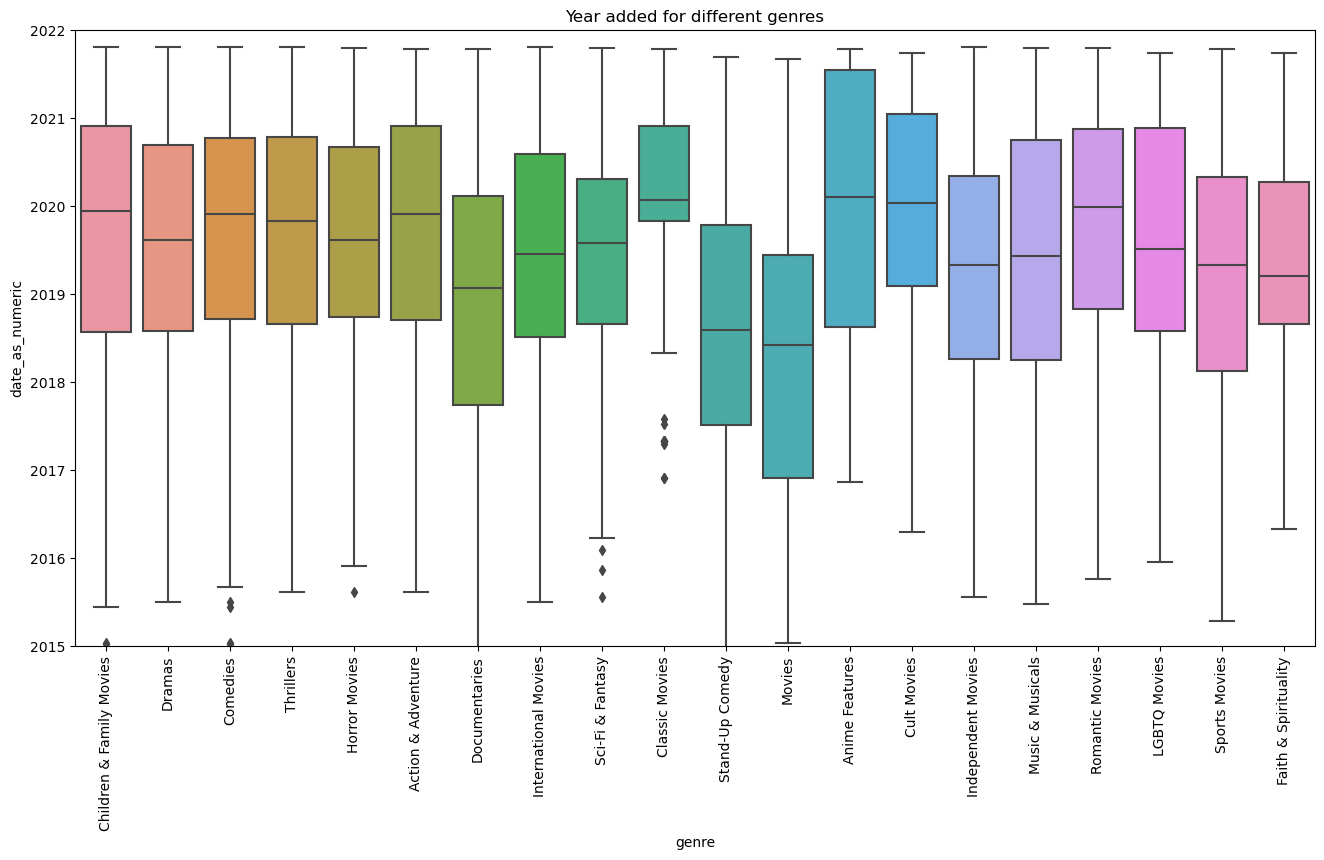

In [54]:
# Year added for different genres of Movies
plt.figure(figsize=(16, 8))
data_ = final.loc[final["type"]=="Movie", ["title", "genre", "date_added"]].drop_duplicates()

# Convert the "date_added" column to datetime type
data_["date_added"] = pd.to_datetime(data_["date_added"])

# Now you can use the .dt accessor
data_["date_as_numeric"] = data_["date_added"].dt.year + (data_["date_added"].dt.month * 30) / 365 + data_["date_added"].dt.day / 365

plt.xticks(rotation=90)
sns.boxplot(data=data_, x="genre", y="date_as_numeric")
plt.ylim([2015, 2022])
plt.title("Year added for different genres")

# We see that 'Anime Features' genre has the highest median year and the box itself is above than any other genre.
# This implies Anime genre is getting popular in recent times.
# The genre 'Movies' was mostly being added in the earlier days of Netflix.
# Classical Movies have been added recently

## Heatmaps and Pairplots

<Figure size 1800x1200 with 0 Axes>

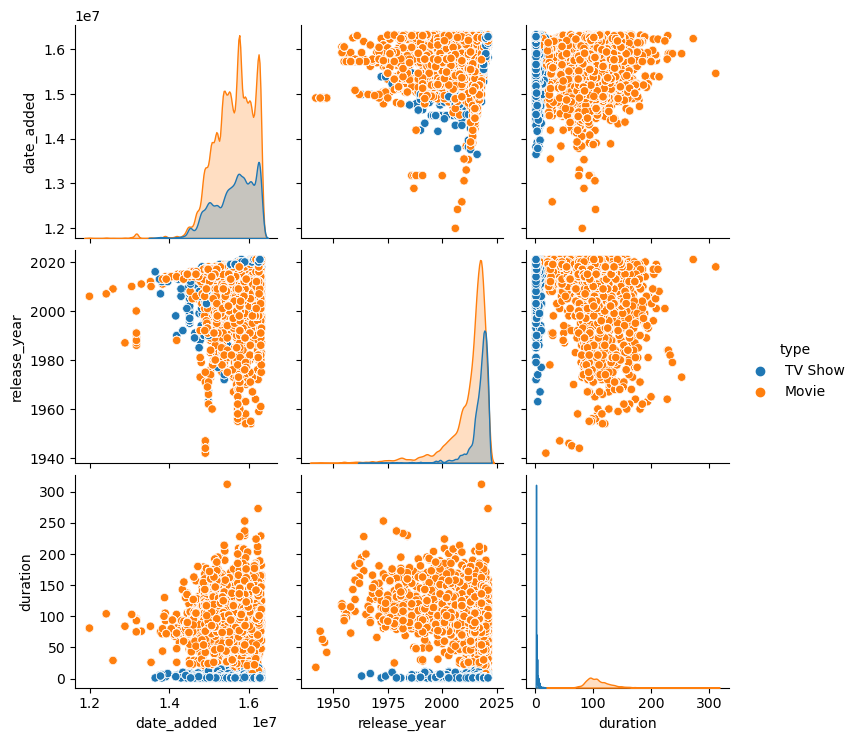

In [55]:
# Pairplot for numeric data
final2 = final.copy()
# Convert the "date_added" column to datetime type
final2["date_added"] = pd.to_datetime(final2["date_added"])
final2["date_added"] = final2["date_added"].apply(lambda x: x.value)/100000000000

plt.figure(figsize=(18, 12))
sns.pairplot(final2, hue="type")

# We see that TV shows duration mostly appear at 1, and movies mainly appear around 100.
# Most of the movies/shows have been added recently.
# The release years have been sparse before the year 2000, but after that it seems the number per year is uniform

<Axes: xlabel='None-genre', ylabel='country'>

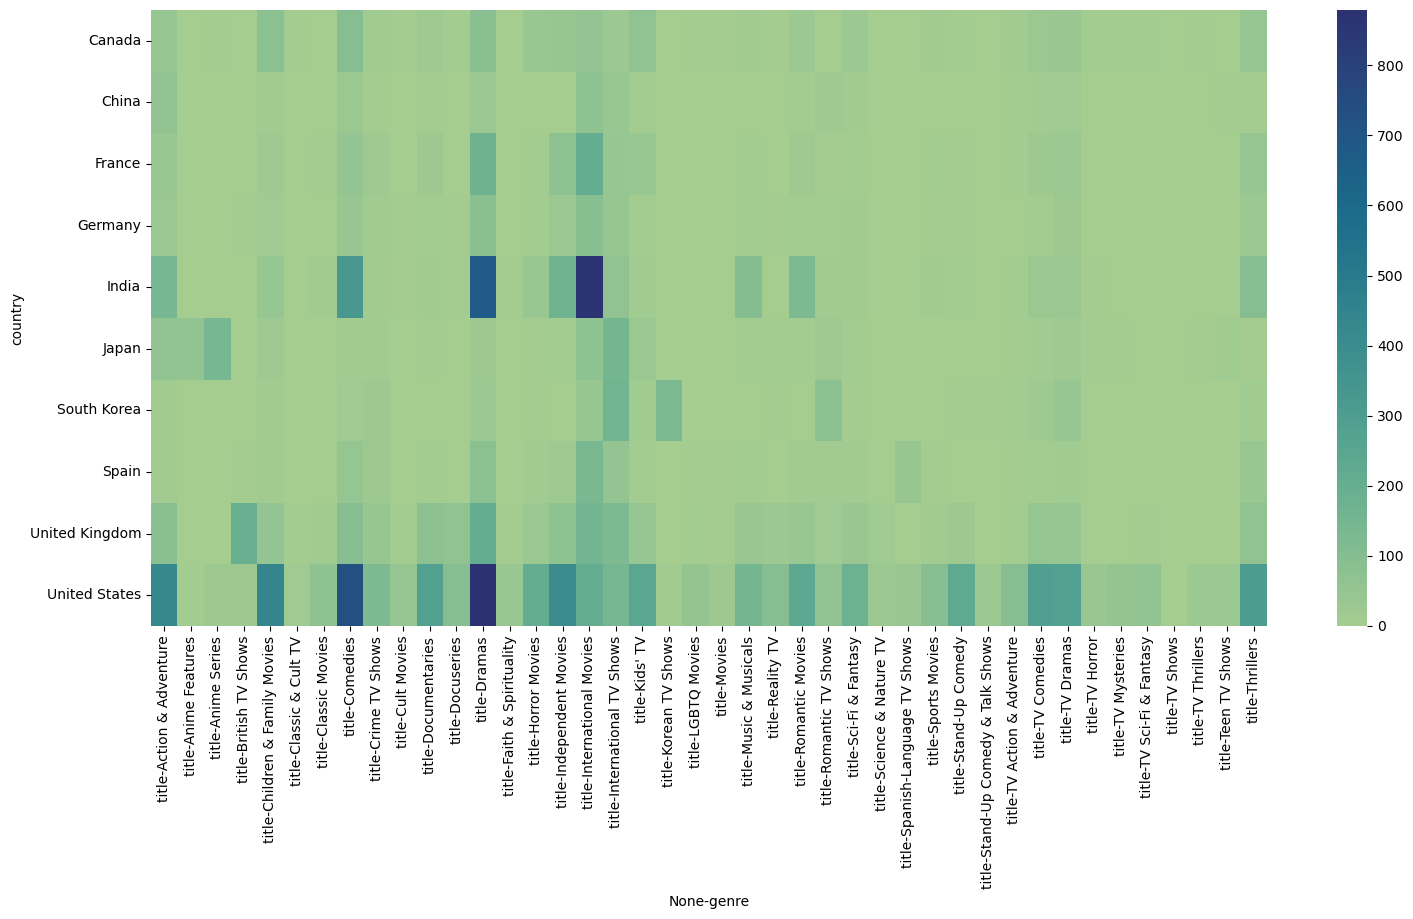

In [56]:
# Heatmap to show which genre is the most popular among the top 10 countries
top_country = final.groupby("country").apply(lambda x: x["title"].nunique()).sort_values(ascending = False).head(10).index
data_ = final.loc[final["country"].isin(top_country),["title", "country", "genre"]].drop_duplicates()
data_ = pd.pivot_table(data = data_, index = "country", columns = "genre", aggfunc = "count").fillna(0)
plt.figure(figsize = (18,8))
sns.heatmap(data_,cmap = "crest")

# In India, the genre 'International movies' and 'Dramas' seems to be most popular.
# In US, the genre 'Dramas' and 'Comedy' seems to be the most popular.

## 5. Missing values and outlier check


### 5.1 Missing values have already been addressed in the Preprocessing of the Data set

### 5.2 Outlier Check

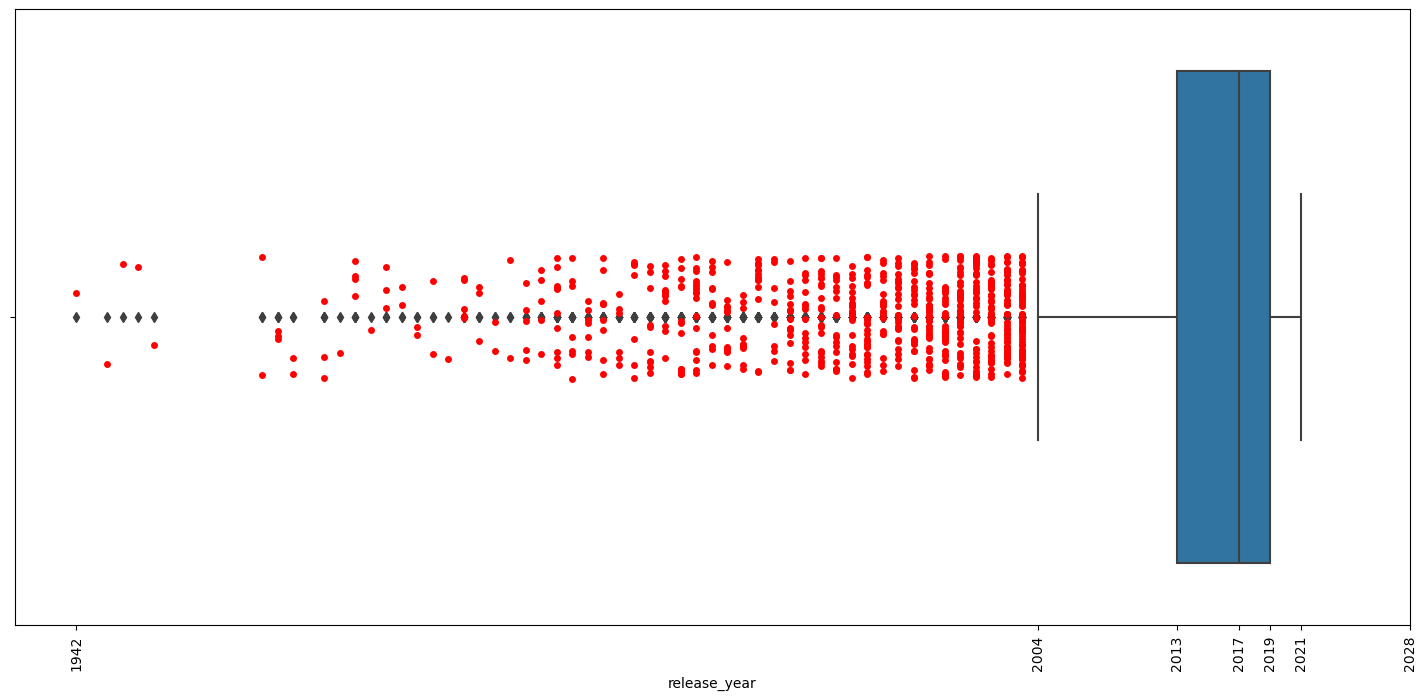

In [57]:
# Checking for outliers in the release_year column
df = final.loc[:, ["title", "release_year"]].drop_duplicates()
outl = df["release_year"].describe()
Q1 = outl.loc["25%"]
Q3 = outl.loc["75%"]
iqr = Q3 - Q1
low = Q1 - 1.5*iqr
upp = Q3 + 1.5*iqr
outliers = df[(df["release_year"]<low) | (df["release_year"]>upp)]
plt.figure(figsize = (18,8))
plt.xticks(rotation=90)
sns.boxplot(x = df["release_year"])
sns.stripplot(x = outliers["release_year"], color = "red")
plt.xticks([df["release_year"].min(), low, Q1,df["release_year"].median(), Q3, upp, df["release_year"].max() ])
plt.show()
# Since most of the movies/shows have been added recently, there are no outliers above the upper whisker
# All the shows/movies in the outliers are from the year 1942 to 2004.

In [58]:
outliers


,title,release_year
5,Sankofa,1993
16,Avvai Shanmughi,1996
18,Jeans,1998
20,Minsara Kanavu,1997
35,Jaws,1975
...,...,...
7940,Wyatt Earp,1994
7942,XXx,2002
7944,Y Tu Mamá También,2001
7946,Yaadein,2001


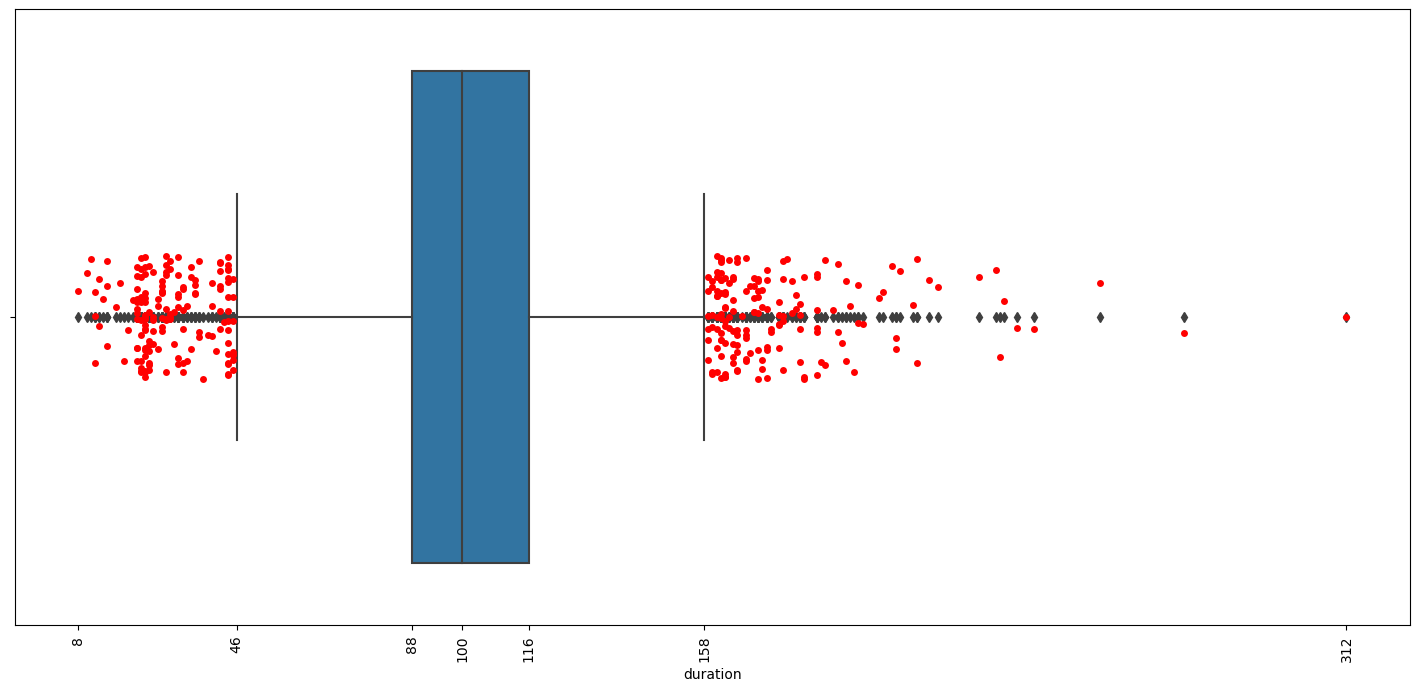

In [59]:
# Checking for outliers in the movies duration column
df = final.loc[final["type"] =="Movie", ["title", "duration"]].drop_duplicates()
outl = df["duration"].describe()
Q1 = outl.loc["25%"]
Q3 = outl.loc["75%"]
iqr = Q3 - Q1
low = Q1 - 1.5*iqr
upp = Q3 + 1.5*iqr
outliers = df[(df["duration"]<low) | (df["duration"]>upp)]
plt.figure(figsize = (18,8))
plt.xticks(rotation=90)
sns.boxplot(x = df["duration"])
sns.stripplot(x = outliers["duration"], color = "red")
plt.xticks([df["duration"].min(), low, Q1,df["duration"].median(), Q3, upp, df["duration"].max()])
plt.show()
# We see there are many outliers below the time duration of 46 mins.
# The outliers beyond upper whisker range from 158 - 312 mins.

In [60]:
outliers



,title,duration
16,Avvai Shanmughi,161.0
18,Jeans,166.0
62,A StoryBots Space Adventure,13.0
64,King of Boys,182.0
148,Once Upon a Time in America,229.0
...,...,...
7824,Trimurti,173.0
7833,Tukaram,162.0
7849,Under an Arctic Sky,40.0
7940,Wyatt Earp,191.0


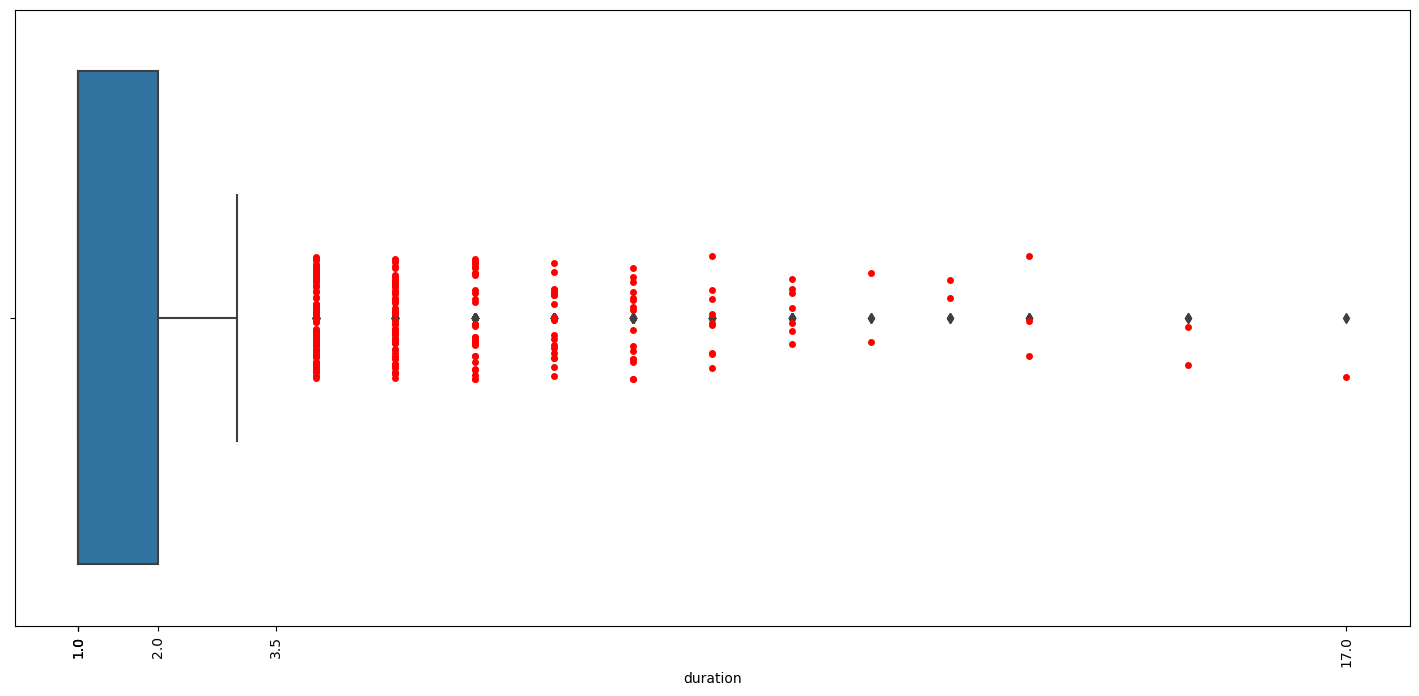

In [61]:
# Checking for outliers in the movies duration column
df = final.loc[final["type"] =="TV Show", ["title", "duration"]].drop_duplicates()
outl = df["duration"].describe()
Q1 = outl.loc["25%"]
Q3 = outl.loc["75%"]
iqr = Q3 - Q1
low = Q1 - 1.5*iqr
upp = Q3 + 1.5*iqr
outliers = df[(df["duration"]<low) | (df["duration"]>upp)]
plt.figure(figsize = (18,8))
plt.xticks(rotation=90)
sns.boxplot(x = df["duration"])
sns.stripplot(x = outliers["duration"], color = "red")
plt.xticks([df["duration"].min(), Q1,df["duration"].median(), Q3, upp, df["duration"].max()])
plt.show()
# Most of the TV shows predominantly appear around 1 season mark.
# That is why there is no lower whisker, the median itself is 1.
# Outliers start appearing after season 4 or more.

In [62]:
outliers

,title,duration
6,The Great British Baking Show,9.0
11,Dear White People,4.0
15,Resurrection: Ertugrul,5.0
48,Nailed It,6.0
58,Numberblocks,6.0
...,...,...
7747,The Twilight Zone (Original Series),4.0
7762,The West Wing,7.0
7846,Ugly Duckling,4.0
7896,Weeds,8.0


## 6.1 Insights on range of attributes



### Release year: From the above boxplot to find the outliers in the release_year column, we see that the range of movie/show release year is from 1942 to 2021. The older movies/shows are less compared to recently released ones.

### Movie duration: From the outlier boxplot mentioned above, we see that it ranges from as low as 8 mins to 312 mins!. However the ideal time duration for a movie is 100 mins(median).

### TV show duration: From the  above mentioned boxplots, we see that the number of seasons of TV show ranges from 1 to 17. Majority of them are 1 season shows. The number of shows which is aired for 4 or more seasons is very less.

### Rating: The number of movies/shows for each rating range from 3 (NC-17, UR) to 2884 (TV-MA). Which means the succefull shows on Netflix are usually from the rating of TV-MA and TV-14.

### Genre: The number of movies/shows for each genre is mapped. It is found that 'Internation Movies' genre has 2574(highest) count and 'TV Shows' genre has 11(least) count.

## 6.2 Distribution of variables and relation between them

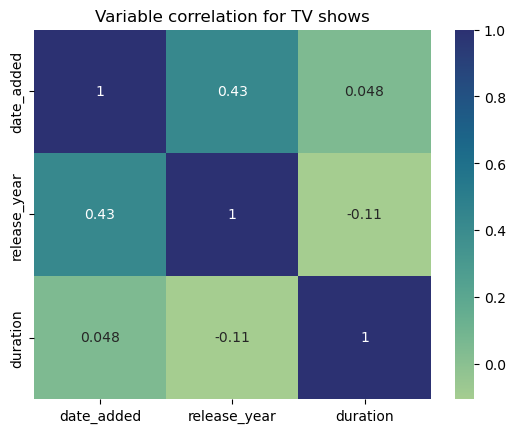

In [65]:
# Variable correlation for TV shows

final2 = final.copy()
final2["date_added"] = pd.to_datetime(final2["date_added"]).apply(lambda x: x.value)/100000000000
final2 = final2.loc[final2["type"] == "TV Show", ["title","date_added","release_year", "duration"]].drop_duplicates()[["date_added","release_year", "duration"]]
sns.heatmap(final2.corr(), cmap="crest", annot=True)
plt.title("Variable correlation for TV shows")
plt.show()


Text(0.5, 1.0, 'Variable correlation for Movies')

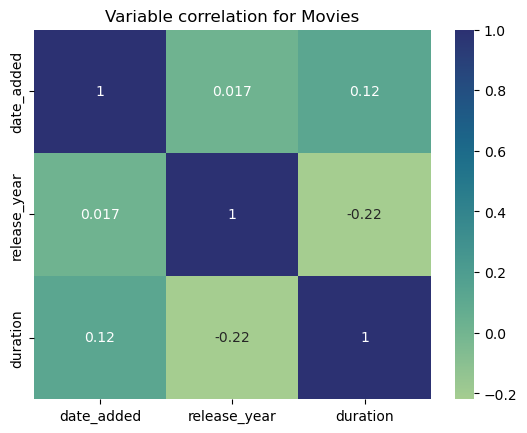

In [71]:
# Variable correlation for Movies
# Variable correlation for Movies
final2 = final.copy()
final2["date_added"] = pd.to_datetime(final2["date_added"]).apply(lambda x: x.value)/100000000000
final2 = final2.loc[final2["type"] =="Movie", ["title","date_added","release_year", "duration"]].drop_duplicates()[["date_added","release_year", "duration"]]
sns.heatmap(final2.corr(), cmap = "crest", annot = True)
plt.title("Variable correlation for Movies")

### It is seen that 'release year' and date added' variables are mildly related, which makes sense because older movies/shows added in the beginning, and over the years as and when new ones came, they were added on the platform. There is no relation between 'duration' and 'date added'. However 'duration' and 'release year' have negative correlation which means the duration of movies/shows have have slightly decreased over the years.

## 7. Business Insights 

### 1. Countries : There are 113 countries but most of the movies/shows come from these top 5 countries -  US, India, UK, Canada and France. 

### 2. Successfull directors: Marcus Raboy, Martin Campbell, Toshiya Shinohara

### 3. We see that 70% of the content on netflix is Movies and 30% is TV Shows.

In [72]:
final.groupby("type")["title"].apply(lambda x: x.nunique())*100/final.groupby("type")["title"].apply(lambda x: x.nunique()).sum()

type
Movie      70.859434
TV Show    29.140566
Name: title, dtype: float64

### 4. Successfull Actors: Anupam Kher and Shah rukh khan have been featured in the most number of movies. And the top actors list is dominated my India.

### 5. Top Genre: The top 3 Genres are 'International Movies', 'Drama' and 'Comedy'.

### 6. Duration: The median duration for Movies and TV shows are 1h 40mins and 1 season respectively. 

### 7. Genre: Anime and Classical Movie genre are becoming popular recently.  

### 8. Genre duration: We observe median duration of 'classical movies' is the highest and the genre of 'Movies' is the least.

### 9. Favourite genre in the biggest markets: Popular genre in US is 'Drama' and in India it is 'International Movies'.

### 10. In Japan and South Korea, TV shows are more popular than movies. Rest of the remaining top countries, movies are more popular than TV shows.

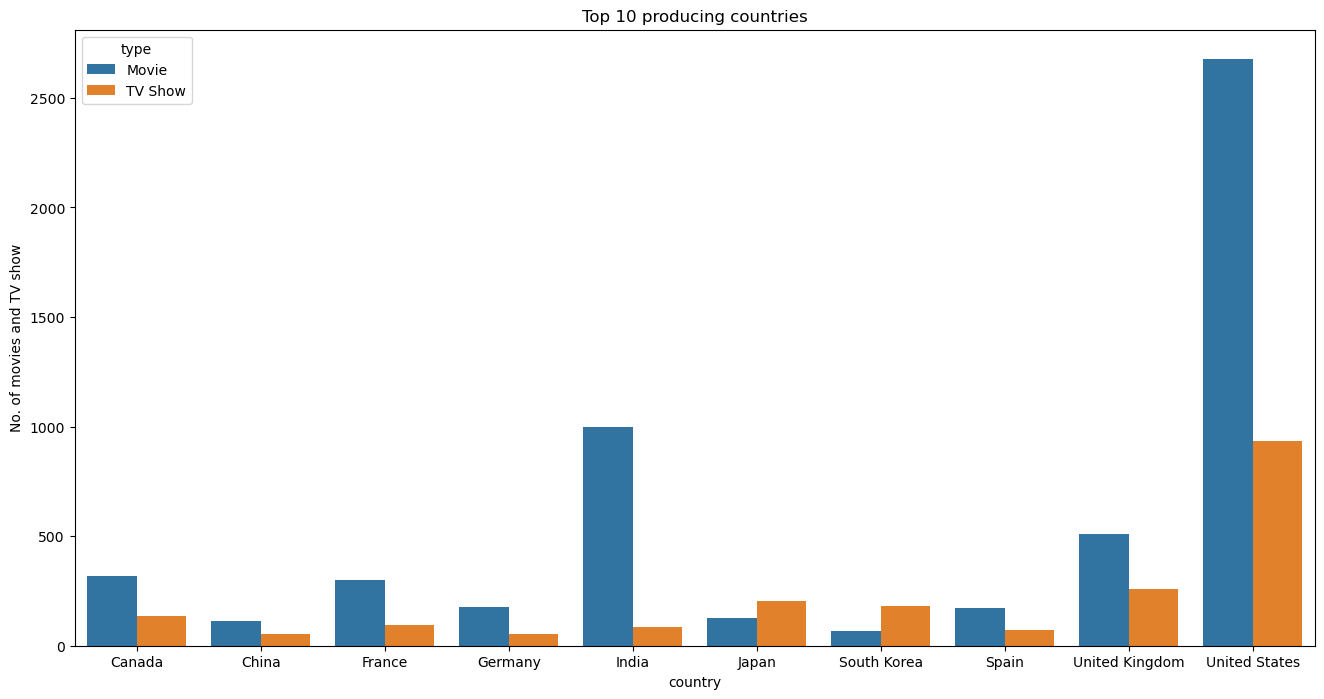

In [74]:
#Top 10 countries and their distribution of movies and TV shows
data_ = final.loc[:, ["type", "title", "country"]].drop_duplicates()
data_ = data_.groupby(["country", "type"])["title"].count().reset_index()
top_country = final.groupby("country").apply(lambda x: x["title"].nunique()).sort_values(ascending = False).head(10).index
data_ = data_[data_["country"].isin(top_country)]

plt.figure(figsize=(16, 8))
sns.barplot(data = data_, x = "country", y ="title", hue = "type")
plt.ylabel("No. of movies and TV show")
plt.title("Top 10 producing countries")
plt.show()

# 8. Recommendations 

### 1. Country: There are 113 countries but not all of them give the most return. We should focus the content more on important countries which - US, India, UK, Canada and France.

### 2. Successful directors: Since certain director's movie/show are featured more than others, Netflix can make original movies/show by hiring the top directors. For example: Marcus Raboy, Martin Campbell, Toshiya Shinohara.

### 3. Successful Actors: If Netflix has the budget to pay for star - studded cast, it can hire popular actors/actress to attract more people into the platform. For example: Anupam Kher, Shah Rukh Khan, Takahiro Sakurai etc,.

### 4. Director - Cast combo: If Netflix has budget constraint, it can hire successful yet lesser know Director- Cast combination. The best combination is mentioned in the table above.

### 5. Targeting the right genre for specific countries: Netflix can recommend popular genre to the audience of that country. For example: US - Drama, comedy, India - International Movies, UK - 'British TV Shows', Japan - Anime etc,. 

### 6. Duration: Netflix can give more preference to movies whose duration is around 1h 40mins, and shows with 1 or 2 seasons. Since data suggests, this is the ideal duration.

### 7. Netflix can produce or sponsor more towards specific genres of movies/show. From the data it is visible that specific genre like 'Anime' and 'classical movies' are getting popular recently throughout the world.

### 8. In countries like Japan and South Korea, Netflix should recommend more TV shows rather than wasting resources on Movies. 

### 9. Should put more content on the platform overall: Because after 2019, the no. of movies/shows added have decreased. People expect latest content.

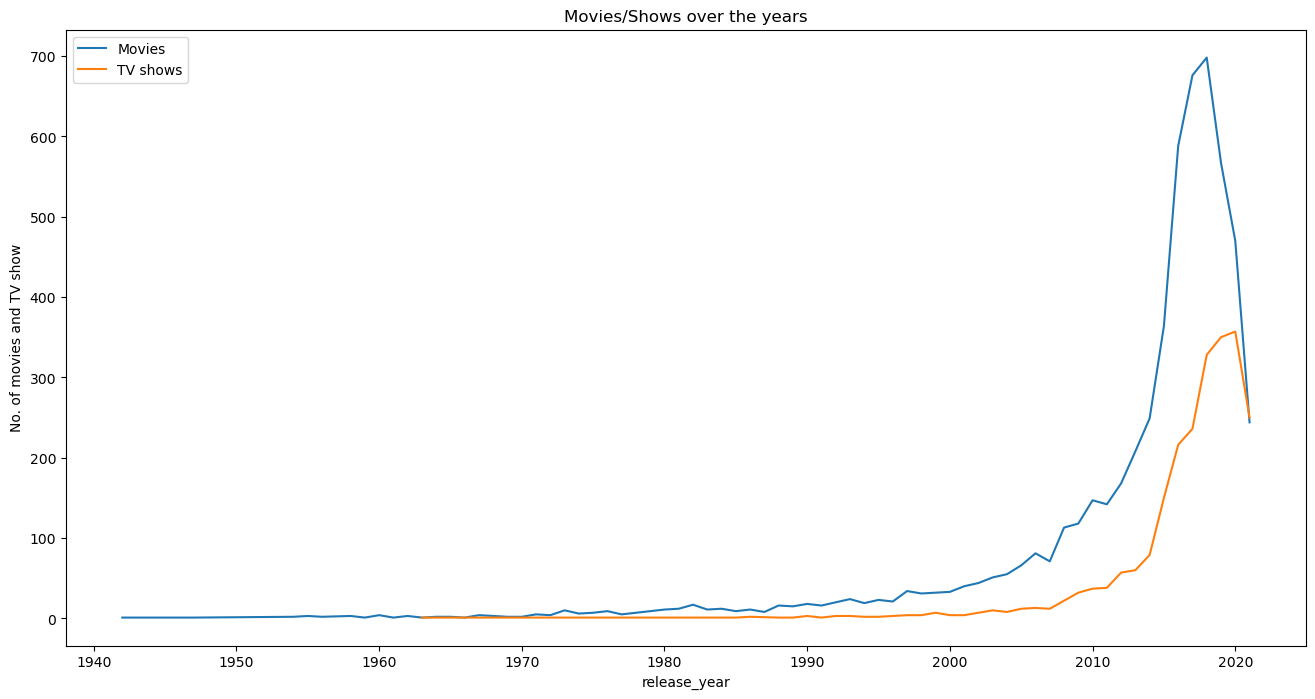

In [75]:
# Movies/Shows released over the years
plt.figure(figsize=(16, 8))
sns.lineplot(data = final[final["type"]=="Movie"].groupby("release_year")["title"].apply(lambda x: x.nunique()), label = "Movies")
sns.lineplot(data = final[final["type"]=="TV Show"].groupby("release_year")["title"].apply(lambda x: x.nunique()),label = "TV shows")
plt.ylabel("No. of movies and TV show")
plt.title("Movies/Shows over the years")
plt.show()

### 10 Rating: If Netflix does produce its original content it should prefer TV-Y, TV-G rating category. Since they are more popular recently.